In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# read data
df = pd.read_csv('../Data/DeliveryJourney.csv')
df.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,DestinationLocation,...,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,customerID,customerNameCode,supplierID,supplierNameCode,Driver_MobileNo,Driver_Name,customer_id,vehicleType
0,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,"ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",...,NaN,320.0,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,7082423013,RAMESH,72c00ba8bc7,Mahindra LCV 1MT
1,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",...,NaN,103.0,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,7082423014,RAMESH,b18a428ac77,Mahindra LCV 1MT
2,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",...,NaN,300.0,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,7082423015,GIRI,2fdd0374a03,Mahindra LCV 1MT
3,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",...,NaN,61.0,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,7082423016,RAVI,dc6358b12c3,Mahindra LCV 1MT
4,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",...,NaN,240.0,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,7082423017,TAMIL,c12e35b23ad,Mahindra LCV 1MT


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BookingID                      10004 non-null  object 
 1   Market/Regular                 10004 non-null  object 
 2   BookingID_Date                 10004 non-null  object 
 3   vehicle_no                     10004 non-null  object 
 4   Origin_Location                10004 non-null  object 
 5   Destination_Location           10004 non-null  object 
 6   Org_lat_lon                    10004 non-null  object 
 7   Des_lat_lon                    10004 non-null  object 
 8   Planned_ETA                    10004 non-null  object 
 9   DestinationLocation            10004 non-null  object 
 10  Curr_lat                       9051 non-null   float64
 11  Curr_lon                       9051 non-null   float64
 12  ontime                         9984 non-null  

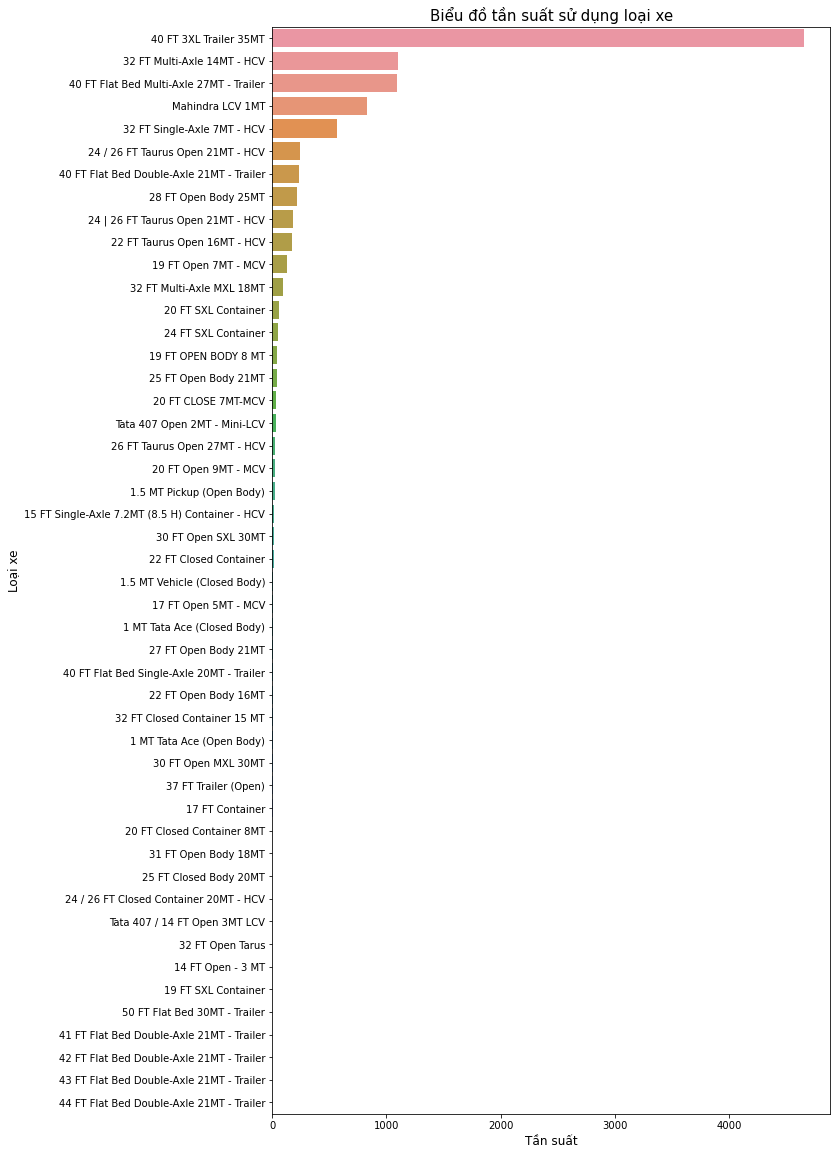

In [15]:
# Biểu đồ tần suất sử dụng loại xe, sắp xếp theo thứ tự giảm dần    
plt.figure(figsize=(10,20))
sns.countplot(y='vehicleType', data=df, order = df['vehicleType'].value_counts().index)
plt.title('Biểu đồ tần suất sử dụng loại xe', fontsize=15)
plt.ylabel('Loại xe', fontsize=12)
plt.xlabel('Tần suất', fontsize=12)
plt.show()

Nhận xét: ta thấy 40 FT 3XL Trailer 35MT là loại xe được sử dụng nhiều nhất

In [16]:
# convert BookingID_Date to datetime
df['BookingID_Date'] = pd.to_datetime(df['BookingID_Date'])

# lấy năm
df['BookingID_Date'].dt.year.unique()

array([2020, 2019], dtype=int64)

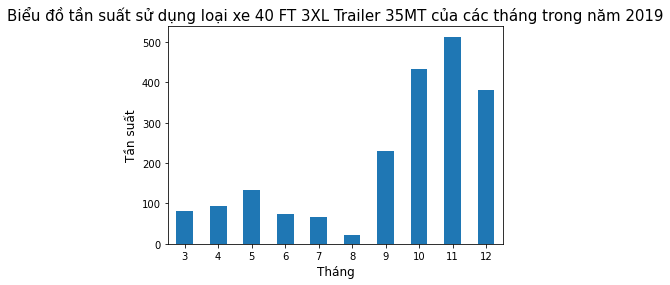

In [24]:
# Biểu đồ bar tần suất sử dụng loại xe '40 FT 3XL Trailer 35MT' của các tháng trong năm 2019
df_2019 = df[df['BookingID_Date'].dt.year == 2019]
df_2019['BookingID_Date'].dt.month.unique()

df_2019_3XL = df_2019[df_2019['vehicleType'] == '40 FT 3XL Trailer 35MT']
df_2019_3XL['BookingID_Date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Biểu đồ tần suất sử dụng loại xe 40 FT 3XL Trailer 35MT của các tháng trong năm 2019', fontsize=15)
plt.ylabel('Tần suất', fontsize=12)
plt.xlabel('Tháng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Nhận xét: ta thấy 40 FT 3XL Trailer 35MT được sử dụng ít vào 8 tháng đầu năm (với tần suất sử dụng khoảng 150), 4 tháng cuối năm tần suất sử dụng tăng mạnh (từ khoảng 200 đến 500)